# Pyber Insights

* In rural cities, average fare prices are higher than in suburban or urban areas. However, these rural areas account for less than 7% of all Pyber fare revenue.   
* Over 68% of all Pyber rides occur in urban cities, accounting for nearly 63% of all fare revenue.  
* A disproprtionate number of drivers are located in urban cities, nearly 81%.  Suburban cities, as a comparison, comprise about 31% of all Pyber rides and account for only 17% of drivers.  

In [1]:
%matplotlib notebook
%matplotlib inline

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [3]:
# read in data

city_data = pd.read_csv("data/city_data.csv")
ride_data = pd.read_csv("data/ride_data.csv")


In [4]:
# create dataframes for each data set and then merge into one df, preview data
city_df = pd.DataFrame(city_data)
ride_df = pd.DataFrame(ride_data)
pyber_merged_df = pd.merge(city_df, ride_df, on="city")
pyber_merged_df.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [5]:
# break out data for URBAN city type

urban_df = pyber_merged_df.loc[pyber_merged_df["type"]=="Urban"]
#urban_df.head()


In [6]:
# break out data for SUBURBAN city type

suburban_df = pyber_merged_df.loc[pyber_merged_df["type"]=="Suburban"]
#suburban_df.head()


In [7]:
# break out data for RURAL city type

rural_df = pyber_merged_df.loc[pyber_merged_df["type"]=="Rural"]
#rural_df.head()


In [8]:
# identify avg fare per city in URBAN type

urban_city_avg_fare = urban_df.groupby('city', as_index=True).agg({"fare": "mean"})
#urban_city_avg_fare.head()


In [9]:
# identify avg fare per city in SUBURBAN type

suburban_city_avg_fare = suburban_df.groupby('city', as_index=True).agg({"fare": "mean"})
#suburban_city_avg_fare.head()


In [10]:
# identify avg fare per city in RURAL type

rural_city_avg_fare = rural_df.groupby('city', as_index=True).agg({"fare": "mean"})
#rural_city_avg_fare.head()


In [11]:
# identify ride count per city in URBAN type

urban_rides_city = urban_df.groupby('city', as_index=True).agg({"ride_id": "count"})
#urban_rides_city.head()


In [12]:
# identify ride count per city in SUBURBAN type

suburban_rides_city = suburban_df.groupby('city', as_index=True).agg({"ride_id": "count"})
#suburban_rides_city.head()


In [13]:
# identify ride count per city in RURAL type

rural_rides_city = rural_df.groupby('city', as_index=True).agg({"ride_id": "count"})
#rural_rides_city.head()


In [14]:
# identify driver count per city in URBAN type

urban_drivers_city = urban_df.groupby('city', as_index=True).agg({"driver_count": "mean"})
#urban_drivers_city.head()


In [15]:
# identify driver count per city in SUBURBAN type

suburban_drivers_city = suburban_df.groupby('city', as_index=True).agg({"driver_count": "mean"})
#suburban_drivers_city.head()


In [16]:
# identify driver count per city in RURAL type

rural_drivers_city = rural_df.groupby('city', as_index=True).agg({"driver_count": "mean"})
#rural_drivers_city.head()


## Bubble Plot of Ride Sharing Data

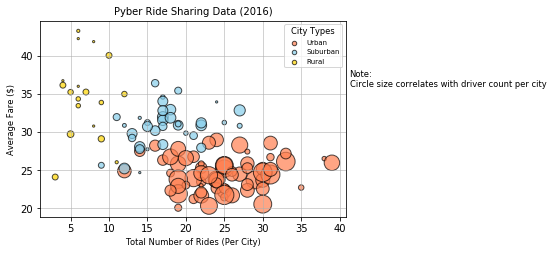

In [17]:
plt.figure(figsize=(10,4))
plt.grid(alpha=0.7)

# plot each set of data, formatting with color and label
plt.scatter(x=urban_rides_city, y=urban_city_avg_fare, s=urban_drivers_city*5, alpha=0.7, color="coral", edgecolors="black", label="Urban")
plt.scatter(x=suburban_rides_city, y=suburban_city_avg_fare, s=suburban_drivers_city*5, alpha=0.7, color="skyblue", edgecolors="black", label="Suburban")
plt.scatter(x=rural_rides_city, y=rural_city_avg_fare, s=rural_drivers_city*5, alpha=0.7, color="gold", edgecolors="black", label="Rural")

# axes labels and titles
plt.title("Pyber Ride Sharing Data (2016)", size="medium")
plt.xlabel("Total Number of Rides (Per City)", size="small")
plt.ylabel("Average Fare ($)", size="small")

# create legend
lgnd= plt.legend(loc="best", title="City Types", fontsize="x-small", title_fontsize="small")
lgnd.legendHandles[0]._sizes = [20]
lgnd.legendHandles[1]._sizes = [20]
lgnd.legendHandles[2]._sizes = [20]

# add text note to describe circle size
plt.text(.555, 0.65, "Note:\nCircle size correlates with driver count per city", fontsize="small", transform=plt.gcf().transFigure)
plt.subplots_adjust(right=.55)
plt.subplots_adjust(bottom=.2)

# save fig
plt.savefig("pyber_scatter.png")


## Total Fares by City Type

In [18]:
# calculate total fares across all city types
total_fares = pyber_merged_df["fare"].sum()

# calculate total fare for each city type
total_fares_by_type = pyber_merged_df.groupby('type', as_index=True).agg({"fare": "sum"})

# calculate percent by city
percent_fares_by_type = total_fares_by_type / total_fares

# output percentages to list for use in plotting
fares_percent = percent_fares_by_type["fare"].values.tolist()


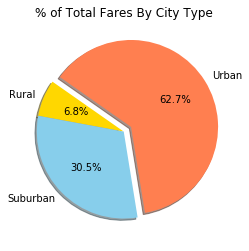

In [19]:
# Create pie chart on fares

types = ["Rural", "Suburban", "Urban"]
colors = ["Gold", "Skyblue", "Coral"]
explode= [0,0,0.1]

plt.pie(fares_percent,labels=types, explode=explode, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=145)

# add title
plt.title("% of Total Fares By City Type", size="large")

# Create axes which are equal so we have a perfect circle
#plt.axis("equal")

# save fig
plt.savefig("pyber_fare_pie.png")

plt.show()

## Total Rides by City Type

In [20]:
# count rides across all city types
total_rides= pyber_merged_df["ride_id"].count()

# count rides for each city type
total_rides_by_type = pyber_merged_df.groupby('type', as_index=True).agg({"ride_id": "count"})

# calculate percent by city
percent_rides_by_type = total_rides_by_type / total_rides

# output percentages to list for use in plotting
rides_percent = percent_rides_by_type["ride_id"].values.tolist()


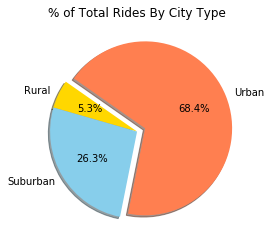

In [21]:
# Create pie chart on rides

plt.pie(rides_percent,labels=types, explode=explode, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=145)

# add title
plt.title("% of Total Rides By City Type", size="large")

# Create axes which are equal so we have a perfect circle
#plt.axis("equal")

# save fig
plt.savefig("pyber_ride_pie.png")

plt.show()

## Total Drivers by City Type

In [22]:
# since same driver count is listed for each city instance, we can't sum to get answer
# let's first create a df that only has city, type and driver count
driver_df = pyber_merged_df[["city","type","driver_count"]]

# now let's drop duplicate rows, which will just return one row per city name
unduplicated_driver_df = driver_df.drop_duplicates()

# now we can sum the total of driver across all cities
total_drivers= unduplicated_driver_df["driver_count"].sum()
total_drivers

# sum drivers for each city type
total_drivers_by_type = unduplicated_driver_df.groupby('type', as_index=True).agg({"driver_count": "sum"})

# calculate percent by city
percent_drivers_by_type = total_drivers_by_type / total_drivers

# output percentages to list for use in plotting
drivers_percent = percent_drivers_by_type["driver_count"].values.tolist()


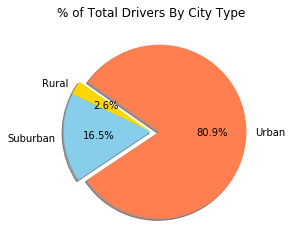

In [23]:
# Create pie chart on rides

plt.pie(drivers_percent,labels=types, explode=explode, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=145)

# add title
plt.title("% of Total Drivers By City Type", size="large")

# Create axes which are equal so we have a perfect circle
#plt.axis("equal")

# save fig
plt.savefig("pyber_driver_pie.png")

plt.show()